In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Understading Crank Nicolson

It is a type of finite difference numerical solver. You can divide numerical solutions into two types called **explicit** and **implicit**. A simplistic way of looking at it is whether computing the next step relies on that next step or not.

An explicit solver would maybe solve

$$
f(u^{n+1}, ...) = g(u^n, ...)
$$

where the superscript is e.g. the time step. An implicit form has

$$
f(u^{n+1}, ...) = g(u^{n+1}, ...)
$$

Our temperature function $\theta$ is the heat eqatuation.

$$
\theta_t - \frac{\kappa}{H^2}\theta_{\xi\xi} = \frac{\xi A}{H}\theta_\xi, \ \ \ \theta_b < 0
\tag{1}
$$

and

$$
\theta_t - \frac{\kappa}{H^2}\theta_{\xi\xi} = 0, \ \ \ \theta_b = 0
$$

We can numerically solve it with Crank Nicolson.

The Crank-Nicolson generic solution for a partial differential equation of the form

$$
\frac{\partial u}{\partial t} = F\left(u,x,t,\frac{\partial u}{\partial x},\frac{\partial^2 u}{\partial x^2}\right)
$$

is

$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} = \frac{1}{2}\left[ F_i^{n+1}\left(u,x,t,\frac{\partial u}{\partial x},\frac{\partial^2 u}{\partial x^2}\right) + F_i^{n}\left(u,x,t,\frac{\partial u}{\partial x},\frac{\partial^2 u}{\partial x^2}\right) \right]
$$

where $F_i^n$ is $F$ evaluated for $i,n$ and $u_i^n$.

$F$ is

$$
F = \frac{\kappa}{H^2}\theta_{\xi\xi} + \frac{\xi A}{H}\theta_\xi
$$

We can discretize it as a "second-order central finite difference" (https://en.wikipedia.org/wiki/Finite_difference) by

$$
f''(x) \approx \frac{\delta_h^2[f](x)}{h^2} = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
$$

In our case $h=\Delta x$ and something like $f(x+h)$ would be $f(x)_{i+1}$.

First order central is

$$
\delta_h[f](x) = f(x+h/2) - f(x-h/2)
$$

From Using https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method#Example:_1D_diffusion_with_advection_for_steady_flow,_with_multiple_channel_connections it seems that I can approximate it with

$$
\delta_h[f](x) = f(x+h/2) - f(x-h/2) \approx \frac{f(x + h) - f(x - h)}{2h}.
$$

Forward

$$
\Delta_h[f](x) = f(x+h) - f(x)
$$

I don't know if it is easy to do the $f(x+h/2)$ hmmm...

The discretization of $\theta_b = 0$ should yield the same as the wikipedia page (https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method#Example:_1D_diffusion) .

### $\theta_b = 0$

$$
\frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{1}{2}\left[\text{DISCRET}\frac{\kappa}{H^2}\theta_{\xi\xi}^{n+1} + \text{DISCRET}\frac{\kappa}{H^2}\theta_{\xi\xi}^{n}\right] = \frac{\kappa}{2H^2(\Delta \xi)^2}\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right)
$$

Let $r=\frac{\kappa\Delta t}{2H^2(\Delta \xi)^2}$ and gather the known and unknown terms

$$
-ru_{i+1}^{n+1} + (1+2r)u_i^{n+1} - ru_{i-1}^{n+1} = ru_{i+1}^n - (1+2r)u_i^{n} + ru_{i-1}^n
$$

This is supposedly a tridiagonal problem and can be solved by tridiagonal matrix algorithms.

https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm

If the problem can be formulated as

$$
a_ix_{i-1} + b_ix_i + c_ix_{i+1} = d_i
$$

We can solve it as

$$
Ax=d=
\begin{bmatrix}
b_1 & c_1 & 0 & ... & ... \cr
a_2 & b_2 & c_2 & ... & ... \cr
0 & a_3 & b_3 & ... & ... \cr
... & ... & ... & ... & c_{n-1} \cr
0 & ... & ... & a_n & b_n
\end{bmatrix}
\begin{bmatrix}
x_1 \cr
x_2 \cr
x_3 \cr
... \cr
x_n
\end{bmatrix}
=
\begin{bmatrix}
d_1 \cr
d_2 \cr
d_3 \cr
... \cr
d_n
\end{bmatrix}
$$

### $\theta_b < 0$


The discretization is then

$$
\frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{\kappa}{2H^2(\Delta \xi)^2}\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right) + \frac{1}{2}\left[\text{DISCRET}\frac{\xi A}{H}\theta_\xi^{n+1} + \text{DISCRET}\frac{\xi A}{H}\theta_\xi^{n} \right]
$$


$$
\frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{\kappa}{2H^2(\Delta \xi)^2}\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right) + \frac{\xi A}{2H}\left[u_{i+1}^{n+1} - u_{i-1}^{n+1} + u_{i+1}^{n} - u_{i-1}^{n} \right]\frac{1}{2\Delta x}
$$

Letting $s=\frac{\xi A \Delta t}{4H\Delta x}$

$$
u_i^{n+1} - u_i^{n} = r\left(\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) + \left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right)\right) + s\left(u_{i+1}^{n+1} - u_{i-1}^{n+1} + u_{i+1}^{n} - u_{i-1}^{n} \right)
$$

$$
u_i^{n+1} - u_i^{n} -r\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) = r\left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right) + s\left(u_{i+1}^{n+1} - u_{i-1}^{n+1}\right) + s\left(u_{i+1}^{n} - u_{i-1}^{n} \right)
$$

$$
u_i^{n+1}  -r\left(u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}\right) -s\left(u_{i+1}^{n+1} - u_{i-1}^{n+1}\right) = r\left(u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}\right) + s\left(u_{i+1}^{n} - u_{i-1}^{n} \right) + u_i^{n}
$$

$$
 -(r+s)u_{i+1}^{n+1} + (1+2r)u_i^{n+1} - (r-s)u_{i-1}^{n+1} = (r+s)u_{i+1}^{n} +  (1-2r)u_i^{n} +  (r-s)u_{i-1}^{n}
\tag{2}
$$

With Claude I go the following discretized matrix A

$$
A=
\begin{bmatrix}
1+2r & -(r+s) & 0 & ... & ... \cr
-(r-s)  & 1+2r & -(r+s) & ... & ... \cr
0 & -(r-s)  & 1+2r & ... & ... \cr
... & ... & ... & ... & -(r+s) \cr
0 & ... & ... & -(r-s)  & 1+2r
\end{bmatrix}
$$

and B

$$
B=
\begin{bmatrix}
1-2r  & r+s & 0 & ... & ... \cr
r-s  & 1-2r  & r+s & ... & ... \cr
0 & r-s  & 1-2r  & ... & ... \cr
... & ... & ... & ... & r+s \cr
0 & ... & ... & r-s & 1-2r
\end{bmatrix}
$$

Where $r=\frac{\alpha\Delta t}{2(\Delta x)^2}=\frac{\kappa\Delta t}{H^2 2(\Delta x)^2}$ (factor two in denom?)

and $s = \frac{\beta \Delta t}{4\Delta x} = \frac{\xi A \Delta t}{H4\Delta x}$

Exactly as eq. 2

So I can compute $Bu^n$ and solve $Au^{n+1}$

### Strategy

- Implement matrices A and B and make a solve step.
- In the solve step find H

$$
H_t = A,\ \ \theta_b<0
$$

$$
H_t = \frac{-H}{\tau_{is}},\ \ \theta_b=0
$$

$$
A = A_{sl}e^{\frac{-H(t)}{z_0}}
$$

with $A_{sl}=0.5ms^{-1}$ accumulation rate at sea level and $z_0=10^3m$ scale height.

The height is determined by A in the binge phase. In the purge phase it just decreases.

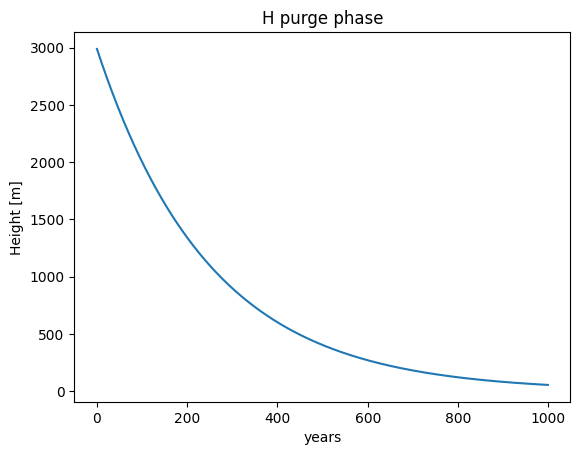

In [2]:
Z_0 = 1e3 # m
A_sl = 0.5 # ms^-1
tau_is = 250 # yrs

def plot_H_purge(_H = 3000, tau_is = 250):
    x = []
    y = []
    H = _H
    for i in range(1000):
        H += -H/tau_is
        x.append(i)
        y.append(H)
    plt.plot(x,y)
    plt.xlabel("years")
    plt.ylabel("Height [m]")
    plt.title("H purge phase")

plot_H_purge()

Modelling $A$ I need a starting height $H(0)$. From MacAyeal I start with $H(0)=1000m$.

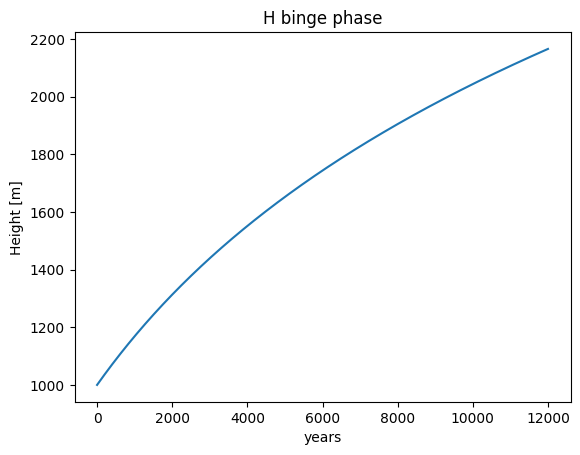

In [3]:
def plot_H_binge(_H0 = 1000, _Asl = A_sl, _Z0 = Z_0):
    x = []
    y = []
    H = _H0
    A = _Asl*np.exp(-H/_Z0)
    for i in range(12000):
        H += A
        A = _Asl*np.exp(-H/_Z0)
        x.append(i)
        y.append(H)
    plt.plot(x,y)
    plt.xlabel("years")
    plt.ylabel("Height [m]")
    plt.title("H binge phase")

plot_H_binge()

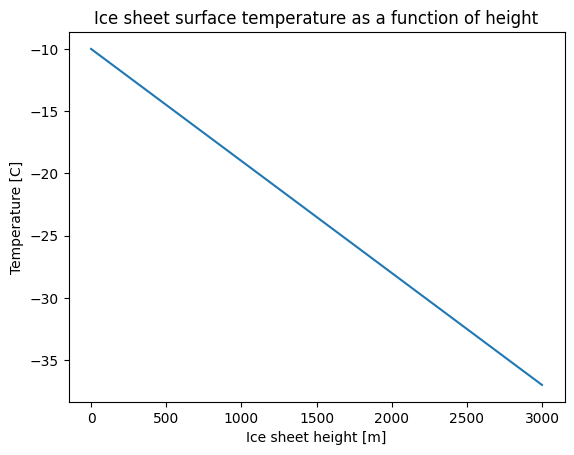

In [4]:
def plot_theta_surface(G_a = 9E-3, theta_sl = -10):
    H = []
    y = []
    for i in range(3000):
        H.append(i)
        y.append(theta_sl - G_a*i)
    plt.plot(H,y)
    plt.xlabel("Ice sheet height [m]")
    plt.ylabel("Temperature [C]")
    plt.title("Ice sheet surface temperature as a function of height")


plot_theta_surface()

Algorithm:

1. Evaluate $\theta_b$
2. Calculate $\frac{\partial H}{\partial t}$
3. Calculate solve $\theta_b$ with Crank-Nicolson

# Binge-purge simulation

In [5]:
YR=60*60*24*365

class Simulation:
    def __init__(self, initial_temp, grid_size, time_step, max_iterations, theta_sl = -10, gamma_a = 9E-3):
        """
        Model attributes
        """
        self.temperature = initial_temp
        self.grid_size = grid_size
        self.time_step = time_step
        self.max_iterations = max_iterations
        self.current_iteration = 0
        self.is_binging_phase = True  # Start in binging phase
        self.report_freq = 100000
        self.grid = np.ones(self.grid_size)*initial_temp
        self.downward_correction = True


        """
        Constants
        """
        self.YR=60*60*24*365
        self.Z0 = 1e3 # m
        self.H = 1000 # m
        self.xi = (np.linspace(0, self.H, self.grid_size)) / self.H
        self.dxi = 1/len(self.xi)
        self.Asl = 0.5 / self.YR # m yr^-1
        self.kappa = 1.4E-6  # m^2 s^-1
        self.theta_sl = theta_sl
        self.gamma_a = gamma_a # 9   # C km^-1
        self.g = 9.82 
        self.rho = 917
        self.G = 0.05  # W m^-2
        self.k = 2  # W C^-1 m^-1
        self.tau_is = 250 * self.YR


        """
        Stored results
        """
        self.T = []
        self.H_hist = []
        self.Time = np.linspace(0, max_iterations*time_step, max_iterations)
        self.switch = [] # Times when a switch occurs


    """
    Solving the tridiagonal problem.
    Constructing the tridiagonal A and B matrices and solving with scipy.solve_banded.
    """
    
    def tridiag(self, diag, upper, lower):
        """
        Build a N-by-N tridiagonal matrix.
        Input:
            Diag:
                Scalar or N-vector
            Upper/Lower:
                Scaler or (N-1)-vector
        """
        T_diag = np.full(self.grid_size, diag)
        T_upper = np.full(self.grid_size-1, upper)
        T_lower = np.full(self.grid_size-1, lower)
        T = np.diag(T_diag)
        T += np.diag(T_upper, k=1)  # k=1 for upper diagonal
        T += np.diag(T_lower, k=-1)  # k=-1 for lower diagonal
        return T

    def A_matrix(self, diag, upper, lower):
        """
        Construct the A matrix in our Ax=Bx problem.
        Sets the appropriate boundary conditions for A.
        Input:
            Diag:
                Scalar or N-vector
            Upper/Lower:
                Scaler or (N-1)-vector
        """
        
        M = self.tridiag(diag, upper, lower)
        if self.is_binging_phase:
            M[0,0] = -1
            M[0,1] = 1
        else:
            M[0,0] = 1
            M[0,1] = 0            
        M[-1,:] = 0
        M[-1,-1] = 1
        return M

    def B_matrix(self, diag, upper, lower):
        """
        Construct the B matrix in our Ax=Bx problem
        Sets the appropriate boundary conditions for B.
        Input:
            Diag:
                Scalar or N-vector
            Upper/Lower:
                Scaler or (N-1)-vector
        """
        M = self.tridiag(diag, upper, lower)
        M[0,:] = 0
        M[-1,:] = 0
        return M

    def solve_tridiag_banded(self, A,b):
        banded_diag = np.diag(A, k=0)
        banded_upper = np.diag(A, k=1)
        banded_upper = np.pad(banded_upper, (len(banded_diag) - len(banded_upper), 0), mode='constant', constant_values=0)
        banded_lower = np.diag(A, k=-1)
        banded_lower = np.pad(banded_lower, (0, len(banded_diag) - len(banded_lower)), mode='constant', constant_values=0)
        banded_tridiag = np.array([banded_upper, banded_diag, banded_lower])
        return solve_banded((1, 1), banded_tridiag, b)

    def binge_bc(self, delta_xi):
        """
        Constructs the boundary conditions to solve for.
        """
        bc = np.zeros(self.grid_size)
        bc[-1] = self.theta_s()
        bc[0] = -self.G*self.dxi*self.H/self.k
        return bc

    def purge_bc(self, delta_xi):
        """
        Constructs the boundary conditions to solve for.
        """
        bc = np.zeros(self.grid_size)
        bc[-1] = self.theta_s()
        bc[0] = 0
        return bc

    def set_downward_correction(self, b):
        """
        Controls whether the downward correction extra term is used in the simulation.
        """
        if type(b) != bool:
            print("Not a boolean.")
            return
        self.downward_correction = b
        

    def binging_phase_step(self):
        """
        Binging phase.
        Constructs the x dimension and scales with height (xi).
        Constructs r and s.
        Constructs A and B matrix and boundary conditions.
        """
        
        A_prev = self.A()
        H_prev = self.H
        self.H += self.A()*self.time_step

        self.xi = (np.linspace(1, self.H, self.grid_size)) / self.H

        r = (self.kappa * self.time_step) / (2 * self.H**2 * self.dxi**2)
        s = (self.xi*A_prev*self.time_step) / (4*self.H*self.dxi)

        r_prev = (self.kappa * self.time_step) / (2 * H_prev**2 * self.dxi**2)
        s_prev = (self.xi*A_prev*self.time_step) / (4*H_prev*self.dxi)
        
        bc = self.binge_bc(self.dxi)

        A = self.A_matrix(1 + 2*r, -(r + s[:-1]), -(r - s[1:]))
        B = self.B_matrix(1 - 2*r_prev, (r_prev + s_prev[:-1]), (r_prev - s_prev[1:]))
        
        x = self.solve_tridiag_banded(A, B@self.grid + bc)
        self.grid = x
        

    def purging_phase_step(self):
        """
        Purging phase.
        Constructs the x dimension and scales with height (xi).
        Constructs r and s.
        Constructs A and B matrix and boundary conditions.
        """
        H_prev = self.H
        self.H += -(self.H*self.time_step)/self.tau_is        
        self.xi = (np.linspace(1, self.H, self.grid_size)) / self.H
        
        r = (self.kappa * self.time_step) / (2 * self.H**2 * self.dxi**2)
        s = (self.xi * (-H_prev/self.tau_is)*self.time_step) / (4*self.H*self.dxi)

        r_prev = (self.kappa * self.time_step) / (2 * H_prev**2 * self.dxi**2)
        s_prev = (self.xi * (-H_prev/self.tau_is)*self.time_step) / (4*H_prev*self.dxi)
        
        bc = self.purge_bc(self.dxi)


        if self.downward_correction:
            A = self.A_matrix(1 + 2*r, -(r + s[:-1]), -(r - s[1:]))
            B = self.B_matrix(1 - 2*r_prev, (r_prev + s_prev[:-1]), (r_prev - s_prev[1:]))
        else:
            A = self.A_matrix(1 + 2*r, -r, -r)
            B = self.B_matrix(1 - 2*r, r, r)
        
        x = self.solve_tridiag_banded(A, B@self.grid + bc)
        self.grid = x
    
    def purge_end_thresh(self):
        """
        Attempt at a threshold to again switch to purge.
        """
        ghk = self.G*(self.H)
        ghk = ghk/self.k        
        grht = self.g*self.rho*((self.H)**3)
        grht = grht/(self.tau_is*self.k)
        return -(ghk + grht)*self.dxi

    
    def grad_bottom(self):
        """
        Gradient at the bottom
        """
        return (self.grid[0]-self.grid[1])
    
    def theta_s(self):
        return self.theta_sl - self.gamma_a*self.H
    
    def A(self):
        return self.Asl * np.exp(-self.H/self.Z0)


    """
    Simulation
    """
    def run_simulation(self):
        while self.step():
            if self.current_iteration % self.report_freq == 0:  # Adjust reporting frequency as needed
                self.report_status()

    def step(self):
        if self.current_iteration >= self.max_iterations:
            return False  # Simulation complete

        self.evaluate_phase() # Evaluates binge or purge
        
        if self.is_binging_phase:
            self.binging_phase_step()
        else:
            self.purging_phase_step()

        self.H_hist.append(self.H)
        self.T.append(np.copy(self.grid))
        self.current_iteration += 1
        return True  # Simulation continues

    def evaluate_phase(self):
        # Check bottom temperature and determine phase
        bottom_temp = self.grid[0]
        current_phase = self.is_binging_phase
        
        if self.is_binging_phase:
            if bottom_temp >= 0:
                self.is_binging_phase = False
        elif not self.is_binging_phase:
            if self.purge_end_thresh() > -self.grad_bottom():
                self.is_binging_phase = True

        if self.is_binging_phase != current_phase:
            self.switch.append(self.current_iteration)

    """
    Other stuff
    """
    
    def set_report_freq(self, frequency):
        self.report_freq = frequency

    def report_status(self):
        phase = "Binging" if self.is_binging_phase else "Purging"
        print(f"Phase: {phase}; H: {self.H:.3f}; T_0: {self.grid[0]:.3f}; T_N: {self.grid[-1]:.3f}; T_max: {self.grid.max():.3f}; grad_xi: {self.grad_bottom():.3f}; thresh: {self.purge_end_thresh():.3f}")



    """
    Plotting and other display functions.
    """

    def eq40(self):
        T = (-self.k*self.theta_sl) / (2*(self.G - self.k*self.gamma_a))
        T = T**2
        T = T*(np.pi/self.kappa)
        print(T/self.YR)

    def get_period_info(self):
        simSwitch = (np.array(self.switch, dtype=np.float64)*self.time_step)/self.YR
        binge2purge = simSwitch[::2]
        purge2binge = simSwitch[1::2]
        l = min(len(binge2purge), len(purge2binge))
        period_binge = np.diff(binge2purge[1:l]).mean()
        period_purge = np.diff(purge2binge[1:l]).mean()
        purge_duration = (purge2binge[1:l]-binge2purge[1:l]).mean()
        binge_duration = (binge2purge[2:l]-purge2binge[1:l-1]).mean()
        return (period_binge, binge_duration, purge_duration)
    
    def print_period_info(self):
        simSwitch = (np.array(self.switch, dtype=np.float64)*self.time_step)/self.YR
        period, binge_duration, purge_duration = self.get_period_info()
        print(f"Phase switches: {simSwitch}")
        print(f"Period: {period:.3f}")
        print(f"Binge duration: {binge_duration:.3f}")
        print(f"Purge duration: {purge_duration:.3f}")
    
    def plot_basal_temp(self, xmin, xmax, ymin, ymax, ax=None):
        if ax == None:
            ax = plt.gca()
        simTime = self.Time / self.YR
        simT = np.array(self.T)
        simSwitch = np.array(self.switch, dtype=np.int64)*self.time_step/self.YR
        
        ax.plot(simTime/1000, simT[:,0], label="Temperatures")
        for s in simSwitch: ax.axvline(s/1000, color="grey", alpha=0.5, linestyle="dashed")
        ax.set_title("Basal T")
        ax.set_xlabel("Time [ka]")
        ax.set_ylabel("Basal Temperature [°C]")
        ax.legend()
        ax.set_ylim(ymin,ymax)
        ax.set_xlim(xmin,xmax)

        if self.downward_correction:
            corr_name = "_corr"
        else:
            corr_name = ""

        if ax == None:
            plt.savefig("basal_t"+corr_name+".png", bbox_inches="tight")
            plt.show()

    def plot_height(self, xmin, xmax, ymin, ymax, ax=None, fill=False):
        if ax == None:
            ax = plt.gca()
        simH = np.array(self.H_hist)
        simTime = self.Time / self.YR
        simSwitch = np.array(self.switch, dtype=np.int64)*self.time_step/self.YR
        
        if fill:        
            ax.fill_between(simTime/1000, simH, label="Height")
        else:
            ax.plot(simTime/1000, simH, label="Height")
            for s in simSwitch: ax.axvline(s/1000, color="grey", alpha=0.5, linestyle="dashed")
        ax.set_title("Ice Height")
        ax.set_xlabel("Time [ka]")
        ax.set_ylabel("Height [m]")
        ax.legend()
        ax.set_ylim(ymin,ymax)
        ax.set_xlim(xmin,xmax)
            
        if self.downward_correction:
            corr_name = "_corr"
        else:
            corr_name = ""

        if ax == None:
            if fill:
                plt.savefig("H_fill"+corr_name+".png", bbox_inches="tight")
            else:
                plt.savefig("H.png"+corr_name+"", bbox_inches="tight")
            plt.show()


In [6]:
def save_ax_region(ax, filename):
    # Get the ax's position in the figure
    extent = ax.get_window_extent().transformed(ax.figure.dpi_scale_trans.inverted())
    
    # Save just that portion with a bit of padding
    ax.figure.savefig(filename, bbox_inches=extent.expanded(1.1, 1.1))



def save_single_ax(ax, filename):
    # Create a new figure and copy the ax content to it
    new_fig = plt.figure()
    new_ax = new_fig.add_subplot(111)
    
    # Copy the contents
    for line in ax.lines:
        new_ax.plot(line.get_xdata(), line.get_ydata())
    
    # Copy other properties if needed
    new_ax.set_xlabel(ax.get_xlabel())
    new_ax.set_ylabel(ax.get_ylabel())
    new_ax.set_title(ax.get_title())
    
    # Save the new figure
    new_fig.savefig(filename)
    plt.close(new_fig)  # Clean up

# Experiments

# Period experiment

Running the experiment to determine the period of binge-purge phases.

Phase switches: [ 3500.  4070. 10760. 11330. 18010. 18580. 25260. 25830.]
Period: 7250.000
Binge duration: 6680.000
Purge duration: 570.000


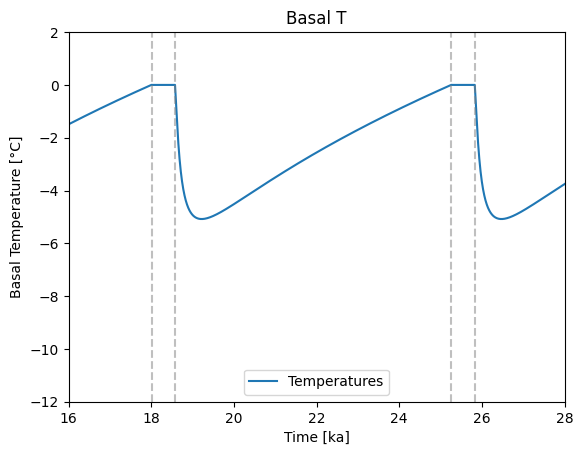

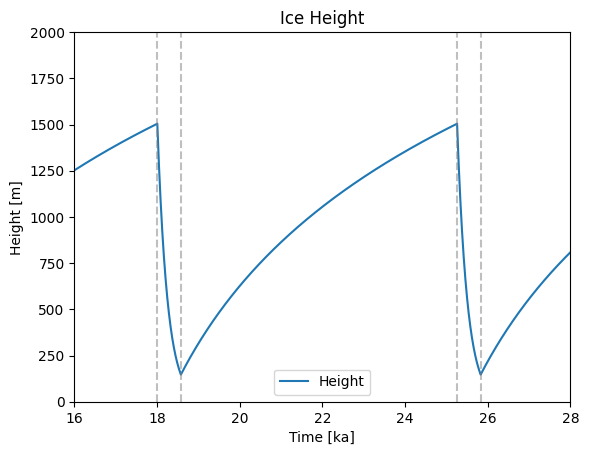

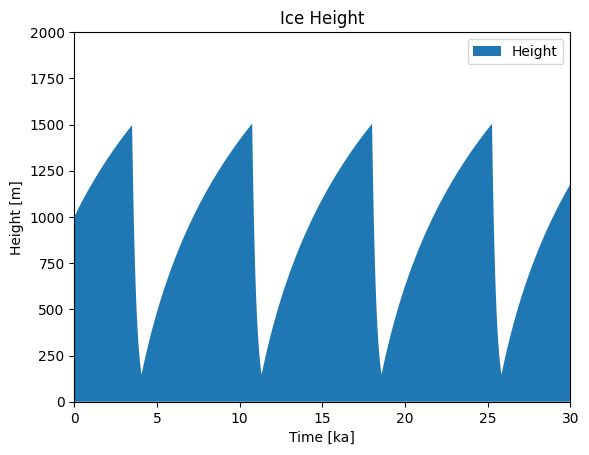

In [7]:
def experiment_dcorr():
    T0 = -10
    grid_size = 500
    time_step = 10*YR
    years = 30E3*YR
    max_iterations = int(years/time_step)
    sim = Simulation(T0, grid_size, time_step, max_iterations)
    sim.set_downward_correction(True)
    
    sim.run_simulation()
    
    sim.print_period_info()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sim.plot_basal_temp(16,28,-12,2,ax)
    fig.savefig("basal_t_dcorr.png", bbox_inches="tight")
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sim.plot_height(16,28,0,2000,ax)
    fig.savefig("H_dcorr.png", bbox_inches="tight")
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sim.plot_height(0,30,0,2000,ax, fill=True)
    fig.savefig("H_fill_dcorr.png", bbox_inches="tight")

    return sim

exp1 = experiment_dcorr()

Phase switches: [ 3500.  3880. 10290. 10670. 17180. 17560. 24080. 24460.]
Period: 6895.000
Binge duration: 6515.000
Purge duration: 380.000


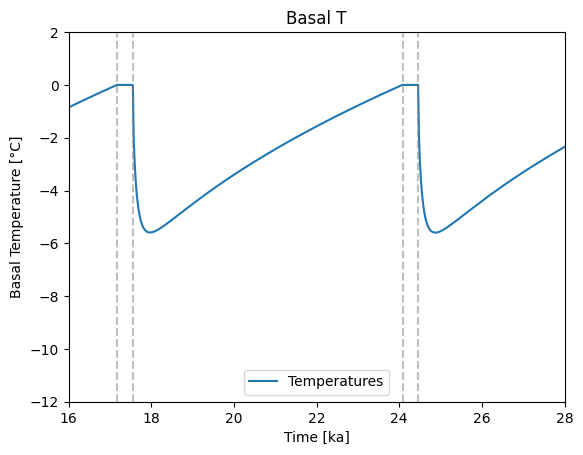

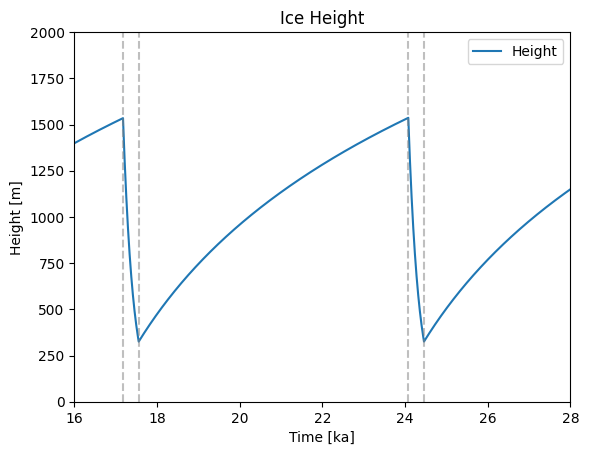

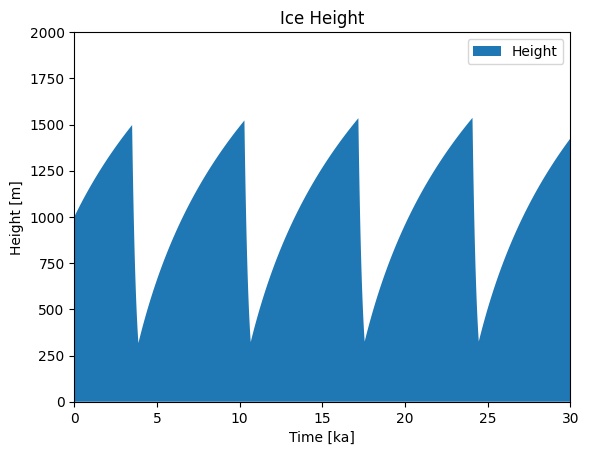

In [8]:
def experiment():
    T0 = -10
    grid_size = 500
    time_step = 10*YR
    years = 30E3*YR
    max_iterations = int(years/time_step)
    sim = Simulation(T0, grid_size, time_step, max_iterations)
    sim.set_downward_correction(False)
    
    sim.run_simulation()
    
    sim.print_period_info()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sim.plot_basal_temp(16,28,-12,2,ax)
    fig.savefig("basal_t.png", bbox_inches="tight")
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sim.plot_height(16,28,0,2000,ax)
    fig.savefig("H.png", bbox_inches="tight")
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sim.plot_height(0,30,0,2000,ax, fill=True)
    fig.savefig("H_fill.png", bbox_inches="tight")

    return sim

exp2 = experiment()

In [9]:
print(np.array(exp2.H_hist).min(), np.array(exp2.H_hist).max())
#simSwitch = np.array(sim.switch, dtype=np.int64)
print(np.array(exp2.T)[np.array(exp2.switch, dtype=np.int64)[0]:,0].min(), np.array(exp2.T)[np.array(exp2.switch, dtype=np.int64)[0]:,0].max())


317.4026443826563 1536.3193066299339
-5.595289836470567 0.004014251771196596


|      |Our model|MacAyeal|
|------|-|-|
|Period|7220|7260|
|Binge duration|6652|6810|
|Purge duration|570|450|

# Comparing with downward correction

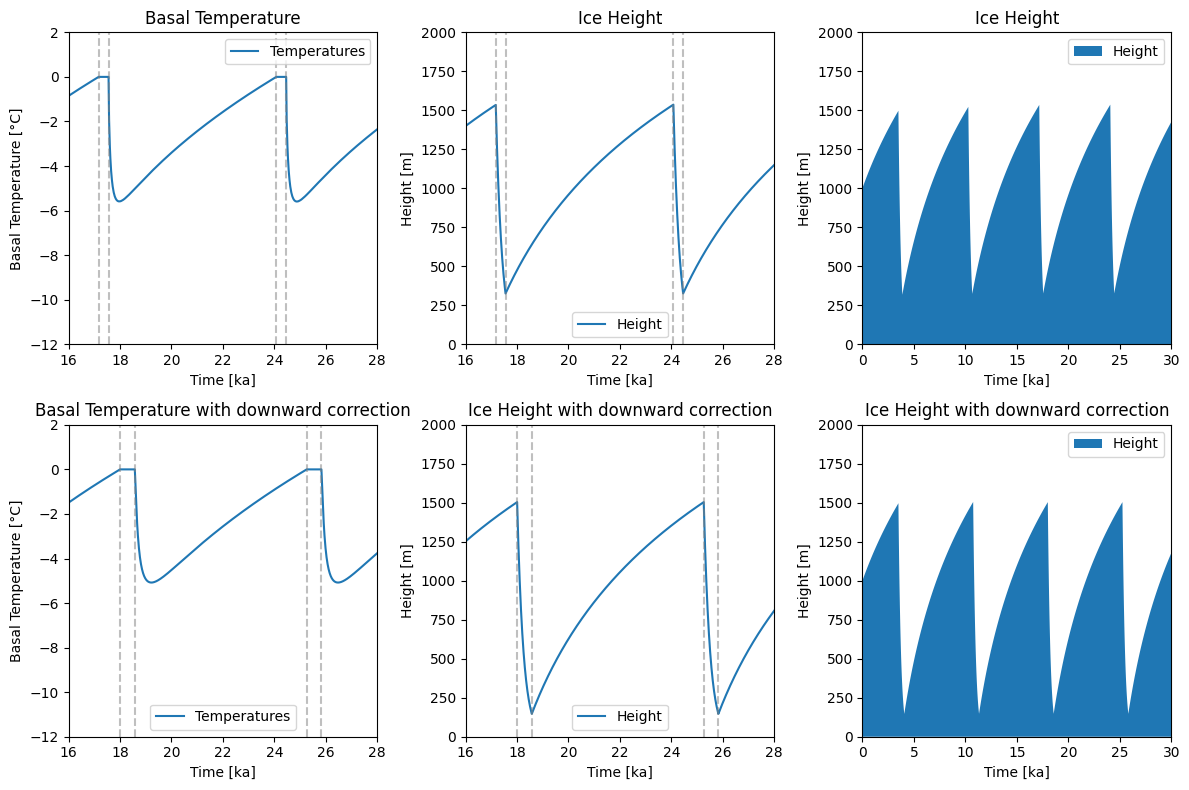

In [10]:
def test_downward_correction():
    fig, ax = plt.subplots(2,3, figsize=(12,8))
    _T0 = -10
    _grid_size = 500
    _time_step = 10*YR
    _years = 30E3*YR
    _max_iterations = int(_years/_time_step)


    
    """
    Without downward correction, closer 
    """
    _sim2 = Simulation(_T0, _grid_size, _time_step, _max_iterations)
    _sim2.set_downward_correction(False)
    _sim2.run_simulation()
    _sim2.plot_basal_temp(16,28,-12,2, ax[0][0])
    _sim2.plot_height(16,28,0,2000, ax[0][1])
    _sim2.plot_height(0,30,0,2000,ax[0][2],fill=True)
    _period, _binge_duration, _purge_duration = _sim2.get_period_info()
    ax[0][0].set_title("Basal Temperature")
    ax[0][1].set_title("Ice Height")
    ax[0][2].set_title("Ice Height")

    
    
    """
    With downward correction
    """
    _sim1 = Simulation(_T0, _grid_size, _time_step, _max_iterations)
    #_sim.set_downward_correction(False)
    _sim1.run_simulation()
    _sim1.plot_basal_temp(16,28,-12,2, ax[1][0])
    #save_single_ax(ax[0][0], "test.png")
    _sim1.plot_height(16,28,0,2000, ax[1][1])
    _sim1.plot_height(0,30,0,2000, ax[1][2], fill=True)
    _period, _binge_duration, _purge_duration = _sim1.get_period_info()
    ax[1][0].set_title("Basal Temperature with downward correction")
    ax[1][1].set_title("Ice Height with downward correction")
    ax[1][2].set_title("Ice Height with downward correction")
    
    plt.tight_layout()
    plt.savefig("correction_comparison.png", bbox_inches="tight")


    


test_downward_correction()

# Changing lapse rate and $\theta_{sl}$

In [11]:
def lapse_rate_test(_lapse_rates, _sea_level_temp):
    _test = dict()
    for g in lapse_rates:
        _lapse_test = []
        for t in sea_level_temp:
            print(t,g)
            _T0 = -10
            _grid_size = 100
            _time_step = 100*YR
            _years = 30E3*YR
            _max_iterations = int(_years/_time_step)
            _sim = Simulation(_T0, _grid_size, _time_step, _max_iterations, theta_sl = t, gamma_a = g)
            #_sim.set_downward_correction(False)
            _sim.run_simulation()
            #_sim.plot_basal_temp(16,28,-12,2)
            _period, _binge_duration, _purge_duration = _sim.get_period_info()
            _lapse_test.append([t,_period])
        _test[g] = np.array(_lapse_test)
    return _test

            



lapse_rates = [6E-3, 9E-3, 12E-3]
#lapse_rates = [6E-3, 9E-3]
sea_level_temp = [-1,-6, -8, -10, -12, -14, -16] #np.linspace(2,-16,9)
#sea_level_temp = [-1]

lapse_test = lapse_rate_test(lapse_rates, sea_level_temp)

-1 0.006
-6 0.006
-8 0.006
-10 0.006
-12 0.006
-14 0.006
-16 0.006
-1 0.009
-6 0.009
-8 0.009


/tmp/ipykernel_35758/3159982917.py:293: RuntimeWarning: Mean of empty slice.
  period_binge = np.diff(binge2purge[1:l]).mean()
/home/bjartur/workspace/anaconda3/envs/scicomp/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_35758/3159982917.py:294: RuntimeWarning: Mean of empty slice.
  period_purge = np.diff(purge2binge[1:l]).mean()
/tmp/ipykernel_35758/3159982917.py:296: RuntimeWarning: Mean of empty slice.
  binge_duration = (binge2purge[2:l]-purge2binge[1:l-1]).mean()


-10 0.009
-12 0.009
-14 0.009
-16 0.009
-1 0.012
-6 0.012
-8 0.012
-10 0.012
-12 0.012
-14 0.012
-16 0.012


/tmp/ipykernel_35758/3159982917.py:295: RuntimeWarning: Mean of empty slice.
  purge_duration = (purge2binge[1:l]-binge2purge[1:l]).mean()


In [12]:
lapse_test

{0.006: array([[-1.0e+00,  3.0e+02],
        [-6.0e+00,  2.3e+03],
        [-8.0e+00,  3.9e+03],
        [-1.0e+01,  5.6e+03],
        [-1.2e+01,  7.6e+03],
        [-1.4e+01,  1.0e+04],
        [-1.6e+01,      nan]]),
 0.009: array([[-1.00000000e+00,  3.50000000e+02],
        [-6.00000000e+00,  2.94285714e+03],
        [-8.00000000e+00,  5.12500000e+03],
        [-1.00000000e+01,  7.50000000e+03],
        [-1.20000000e+01,  1.04000000e+04],
        [-1.40000000e+01,             nan],
        [-1.60000000e+01,             nan]]),
 0.012: array([[-1.00e+00,  3.40e+02],
        [-6.00e+00,  4.55e+03],
        [-8.00e+00,  7.40e+03],
        [-1.00e+01,  1.16e+04],
        [-1.20e+01,       nan],
        [-1.40e+01,       nan],
        [-1.60e+01,       nan]])}

[[-1.0e+00  3.0e+02]
 [-6.0e+00  2.3e+03]
 [-8.0e+00  3.9e+03]
 [-1.0e+01  5.6e+03]
 [-1.2e+01  7.6e+03]
 [-1.4e+01  1.0e+04]
 [-1.6e+01      nan]]
[[-1.00000000e+00  3.50000000e+02]
 [-6.00000000e+00  2.94285714e+03]
 [-8.00000000e+00  5.12500000e+03]
 [-1.00000000e+01  7.50000000e+03]
 [-1.20000000e+01  1.04000000e+04]
 [-1.40000000e+01             nan]
 [-1.60000000e+01             nan]]
[[-1.00e+00  3.40e+02]
 [-6.00e+00  4.55e+03]
 [-8.00e+00  7.40e+03]
 [-1.00e+01  1.16e+04]
 [-1.20e+01       nan]
 [-1.40e+01       nan]
 [-1.60e+01       nan]]


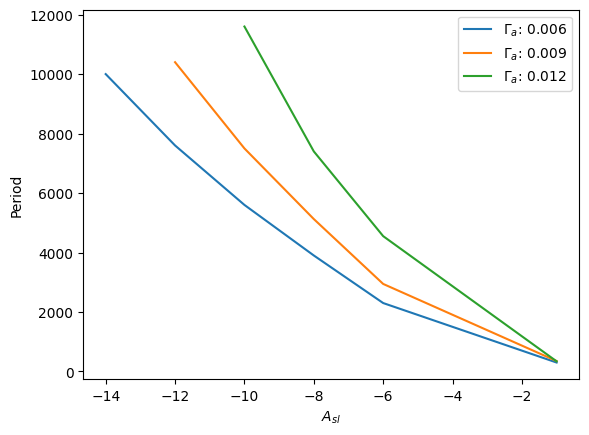

In [22]:
for g in lapse_test:
    print(lapse_test[g])
    plt.plot(lapse_test[g][:,0], lapse_test[g][:,1], label="$\\Gamma_a$: "+str(g))
    plt.xlabel("$A_{sl}$")
    plt.ylabel("Period")
    plt.savefig("lapse.png", bbox_inches="tight")
plt.legend()